# 1.1 Birth Rates

The data on US births, provided by the CDC is in `data/births.csv`.

Reproduce the following plot of births by gender over time given the data:

![](births_gender.png)

Note the `1e6` on the y axis for scale

In [263]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('data/births.csv')
df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


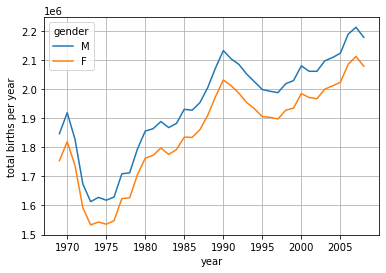

In [264]:
df_male = df[df['gender'] == 'M']
df_female = df[df['gender'] == 'F']
male = df_male.groupby("year").births.sum()
female = df_female.groupby("year").births.sum()

fig, axes = plt.subplots()
axes.plot(male, label='M')
axes.plot(female, label='F')
axes.set_xlabel('year')
axes.set_ylabel('total births per year')
axes.legend(title='gender')
plt.grid()

# 1.2 Births anomalies

This was analyzed by beloved statistician Andrew Gelman [here](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/), leading to this plot:

![](births_gp100.png)

Explain all three plots in Gelman's figure. 

**1.2:** What is the periodic component? What is the residual? Use your research skills to learn then explain it (in english).

Gelman's figure's is a time series showing the anomalies in the number of births in a given day during the whole year with respect to the annual daily average, with holidays such as Thanksgiving and Labor Day highlighted.

1.2)

**Periodic Component**

- Illustrates the cyclical patterns such as when births are higher or lower

    
**Residual**
- Residuals in a time series are what is left over after fitting a model. For many time series models, the residuals are equal to the difference between the observation and the corresponding fitted values. 

# 1.3 Holiday Anomalies Plot

Reproduce *as best you can* the first of the 3 figures from Andrew Gelman's blog post (your plot may have small differences)

**1.3.1:** Reproduce the births line in a plot. Hint: Make the x axis a `pd.datetime` object

**1.3.2:** Reproduce the `smoothed` line. Hint: use a rolling window average

**1.3.3:** Reproduce the entire figure with the mean line as a horizontal. You can make the y axis total births instead of a % deviation from mean axis (they'll look the same anyway)

In [265]:
pd.read_csv('data/births.csv')

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


# 2. Recipe Database

### 2.1 

Load the JSON recipe database we saw in lecture 4.

How many of the recipes are for breakfast food? Hint: The `description` would contain the work "breakfast"

In [266]:
import gzip
import numpy as np
import pandas as pd

with gzip.open('data/recipe.json.gz', 'r') as f:
    data = (line.strip().decode() for line in f)
    data_json = f"[{','.join(data)}]"
recipes = pd.read_json(data_json)
recipes.head()

,_id,name,ingredients,url,image,ts,cookTime,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
0,{'$oid': '5160756b96cc62079cc2db15'},Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276011104},PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man ha...",NaN,NaN,NaN,NaN,NaN
1,{'$oid': '5160756d96cc62079cc2db16'},Hot Roast Beef Sandwiches,12 whole Dinner Rolls Or Small Sandwich Buns (...,http://thepioneerwoman.com/cooking/2013/03/hot...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276013902},PT20M,thepioneerwoman,12,2013-03-13,PT20M,"When I was growing up, I participated in my Ep...",NaN,NaN,NaN,NaN,NaN
2,{'$oid': '5160756f96cc6207a37ff777'},Morrocan Carrot and Chickpea Salad,Dressing:\n1 tablespoon cumin seeds\n1/3 cup /...,http://www.101cookbooks.com/archives/moroccan-...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276015332},NaN,101cookbooks,NaN,2013-01-07,PT15M,A beauty of a carrot salad - tricked out with ...,NaN,NaN,NaN,NaN,NaN
3,{'$oid': '5160757096cc62079cc2db17'},Mixed Berry Shortcake,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/mix...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276016700},PT15M,thepioneerwoman,8,2013-03-18,PT15M,It's Monday! It's a brand new week! The birds ...,NaN,NaN,NaN,NaN,NaN
4,{'$oid': '5160757496cc6207a37ff778'},Pomegranate Yogurt Bowl,For each bowl: \na big dollop of Greek yogurt\...,http://www.101cookbooks.com/archives/pomegrana...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276020318},NaN,101cookbooks,Serves 1.,2013-01-20,PT5M,A simple breakfast bowl made with Greek yogurt...,NaN,NaN,NaN,NaN,NaN


In [267]:
print(str(recipes.description
                 .str.lower()
                 .str.contains("breakfast")
                 .sum()) + ' breakfast recipes in the dataset')

3524 breakfast recipes in the dataset


### 2.2 A simple recipe recommender

Let's build a recipe recommender: given a list of basic ingredients, find a recipe that uses all those ingredients.

Here is the list of ingredients that can be asked for:

```
['salt', 'pepper', 'oregano', 'sage', 'parsley',
 'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']
```

**Hint:** Build a new column for each of the ingredients that indicates whether that ingredient is in the recipe.

**example:**
```
recommend_ingredients(["parsley", "paprika", "tarragon"], df)

result: 
# The rows where these 3 ingredients are in the recipe
[2069, 74964, 93768, 113926, 137686, 140530, 158475, 158486, 163175, 165243]
```

In [268]:
import pandas as pd


def recommend_ingredients(ingredients, df):
    
    ingredient_list = ['salt', 'pepper', 'oregano', 'sage', 
                       'parsley','rosemary', 'tarragon', 
                       'thyme', 'paprika', 'cumin']
    
#build new column for each of the ingredients that indicates whether that ingredient is in the recipe
    for ingredient in ingredient_list:
        df[ingredient] = (df.ingredients.str.lower()
                                        .str.contains(ingredient))
        
    for ingredient in ingredients:
        df = df.loc[df[ingredient] == True]
        
    return list(df.index)

recommend_ingredients(["parsley", "paprika", "tarragon"], recipes)

[2069,
 74964,
 93768,
 113926,
 137686,
 140530,
 158475,
 158486,
 162896,
 163175,
 165243,
 171774]

# 3. Movies!

Recall the [Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset) from lecture 4. It's made up of several tables which we've played with in lecture 4.

The tables have common columns (`id` and `movie_id`) around which you can merge and join tables.

### 3.1 best director

Your task is to find **The best director** in terms of average ratings of his movies. This can be from the `ratings` or `ratings_small` table, or simply the vote average in the `metadata` table. The director can be found in the `cast` table.

You will have to use all of your skills to get this done, between using groupbys and merging multiple tables together

In [269]:
df1 = pd.read_csv('data/archive/credits.csv')
df2 = pd.read_csv('data/archive/movies_metadata.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [270]:
#Change id type to int for both dfs as we need to merge the dfs together

df1['id'] = df1['id'].astype('int')

#df2 has some extraneous characters in the id column so use str replace with regex to remove
df2['id'] = df2['id'].str.replace(' ', '')
df2['id'] = df2['id'].str.replace('[^\w]','')
df2['id'] = df2['id'].str.replace(r"[a-zA-Z]",'')
df2['id'] = df2['id'].astype('int')
df = pd.merge(df2, df1, on='id')

In [271]:
from ast import literal_eval
df['crew'] = df['crew'].apply(literal_eval)

In [272]:
def find_director(movie):
    '''
    - function to find the names of the directors in dataset
    '''
    for i in movie:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

#Create a new column for director by using df['column'].apply[function]
df['director'] = df['crew'].apply(find_director)

It is important to only consider directors with multiple movies and use the average rating as there are directors in this dataset with only one movie that is rated 10. Therefore, I chose a minimum of 10 movies in order to get a holistic impression of the director.

In [273]:
#Also get rid of columns that are no longer necessary

columns_of_interest = ['id', 'title', 'vote_average', 'director']
df = df[columns_of_interest]
df = df[df.groupby('director').director.transform('count') >= 10] #select directors with 10 or more films
df

,id,title,vote_average,director
0,862,Toy Story,7.7,John Lasseter
1,8844,Jumanji,6.9,Joe Johnston
2,15602,Grumpier Old Men,6.5,Howard Deutch
5,949,Heat,7.7,Michael Mann
6,11860,Sabrina,6.2,Sydney Pollack
...,...,...,...,...
45522,49280,The One-Man Band,6.5,Georges Méliès
45523,106807,The Fat and Lean Wrestling Match,6.5,Georges Méliès
45528,84419,House of Horrors,6.3,Jean Yarbrough
45532,30840,Robin Hood,5.7,John Irvin


In [274]:
groupby = df.groupby('director')['vote_average'].mean()
groupby.sort_values(ascending=False).head(10)

director
Sergiu Nicolaescu       7.800000
Hayao Miyazaki          7.700000
Christopher Nolan       7.533333
Quentin Tarantino       7.490000
F.W. Murnau             7.440000
Jean-Pierre Melville    7.413333
Wes Anderson            7.370000
David Fincher           7.350000
Jacques Rivette         7.338889
Krzysztof Kieślowski    7.323077
Name: vote_average, dtype: float64

So it can be seen that the best director in terms of the average ratings their movies recieved (out of all directors that have made at least 10 movies) is Sergiu Nicolaescu